# Overall

```
- 프로젝트명 : 품질관리를 위한 주요인자 분석
- 프로젝트유형 : 데이터 EDA 및 Classification(분류) 예측
- 시나리오 : Wine 품질에 영향을 끼치는 주요 공정변수 파악 및 관리를 통해 7등급 이상 Wine 생산량 증대 목표
    - Wine은 1~9등급이 있고, 7등급 이상이 가장 프리미엄 Wine
    - 7등급 이상의 Wine을 최대한 많이 생산해야 영업이익을 남길 수 있다.

- 문제정의 : 7등급 이상 프리미엄 Wine 생산량 부족
- 기대효과 : 7등급 이상 프리미엄 Wine 생산량 증가, 영업이익 증가
- 해결방안 : Wine 품질에 영향을 미치는 인자 도출 및 공정 관리를 통한 프리미엄 Wine 생산
- 성과측정 : 공정변수 Control 전/후 프리미엄 Wine 생산량 비교
- 운영방향 :
    -  Model을 통해 도출된 중요 공정 변수와 품질간의 상관관계 분석
    - 해당 공정 변수 관리를 통해 프리미엄 Wine 생산
- 참고사항 :
    - 품질 등급은 순서형 정수값이지만, 연속적인 수치 예측을 기반으로 한 회귀 문제로 접근하였고,
    - 예측 결과에 대해 반올림을 적용하여 등급과의 정합성을 평가한 과정이 포함되어 있음
- 분석결과
    - 공정변수 1순위 : density
        - density의 회귀계수가 -61.46 → -87.72로 더 커짐 (절대값 기준)
        - density는 와인 품질과 매우 강한 음의 상관성을 가지며, 핵심적인 품질 결정 요인임
    - 공정변수 2순위 : chlorides의 영향력 변화
        - chlorides 계수가 -0.06 → -2.46로 크게 증가
        - 공선성 제거 후 chlorides의 품질 저하 영향이 더 명확히 드러남
    - 양의 영향력 변수 강화: sulphates
        - sulphates는 0.81 → 0.92로 증가
        - 좋은 품질에 기여하는 양의 변수로서 더 뚜렷한 기여
    - 제거된 변수들: alcohol, residual sugar, etc.
        - alcohol, residual sugar 등은 공선성으로 인해 제거
        - 이들 변수는 공선성이 있었기에 다른 변수와 영향력을 중복해 갖고 있었던 것으로 해석
- 제안
	- 상기 공정 변수를 최우선 관리 변수로서 선정 제안
    - 이후 산출물의 등급 수준의 개선 여부 파악을 통해 실질적 효력 유무를 판단하는 방향을 제안
- Meta data
    - fixed acidity : 산도  
    - volatile acidity : 휘발성 산  
    - citric acid : 시트르산  
    - residual sugar : 잔당  
    - chlorides : 염화물  
    - free sulfur dioxide : 독립 이산화황  
    - total sulfur dioxide : 총 이산화황  
    - density : 밀도  
    - pH : 수소이온농도  
    - sulphates : 황산염  
    - alcohol : 도수  
    - quality : 품질  
- 회고
    - binary 분류 문제 (고등급 or 저등급) 으로 문제를 풀 경우 더 적합한 공정변수 파악이 가능할지 고민해볼 수 있겠습니다.
```

<!-- - 250610 https://colab.research.google.com/drive/1Z6QC9USNH6Xt9TNh550QXkNwPhmT-QjE#scrollTo=ZoKY2VAODSBX -->

<!-- https://colab.research.google.com/drive/1YbUEOH9DoFuOTEaVoJNIuvGUeswQmQVU#scrollTo=fC_-TyGdsNEM -->


# Library

In [1]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background']) # 색상 변경

# 과학표기법을 숫자로 변경하는 과정
pd.options.display.float_format = '{:.2f}'.format



# Data Import

In [2]:
import pandas as pd
df1=pd.read_csv('S_PJT02_DATA1.csv', sep=';')
df2=pd.read_csv('S_PJT02_DATA2.csv', sep=';')

df = pd.concat([df1, df2], axis=0)
df.reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


# Preprocessing

In [3]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
f

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [5]:
df['quality'].value_counts().sort_index(ascending = False)

,count
quality,
9,5
8,193
7,1079
6,2836
5,2138
4,216
3,30


In [6]:
# 분류 문제 이진 컬럼 생성
# 7 이상은 1, 이하는 0
import numpy as np
df['target'] = np.where(df['quality']>6, 1, 0)
df.head(5)

df['target'].value_counts()

,count
target,
0,5220
1,1277


# Correlation (Heatmap)

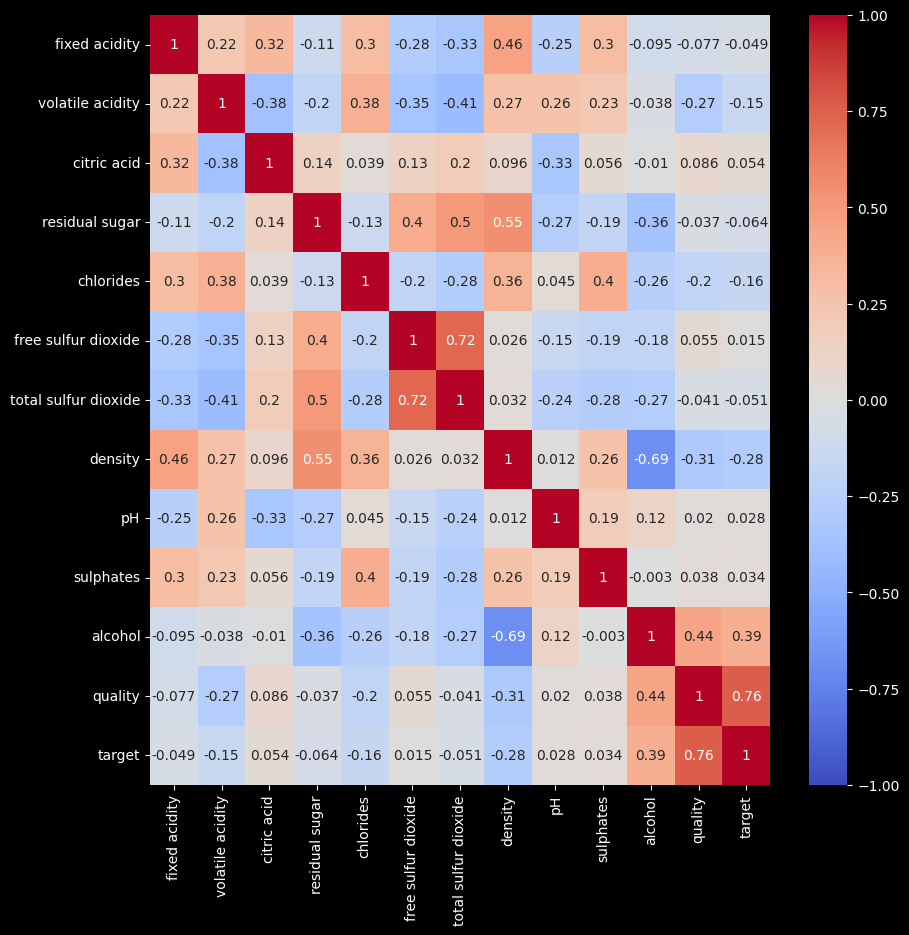

In [7]:
# + alcohol
# - volatile acidity
# - density
# - chlorides

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

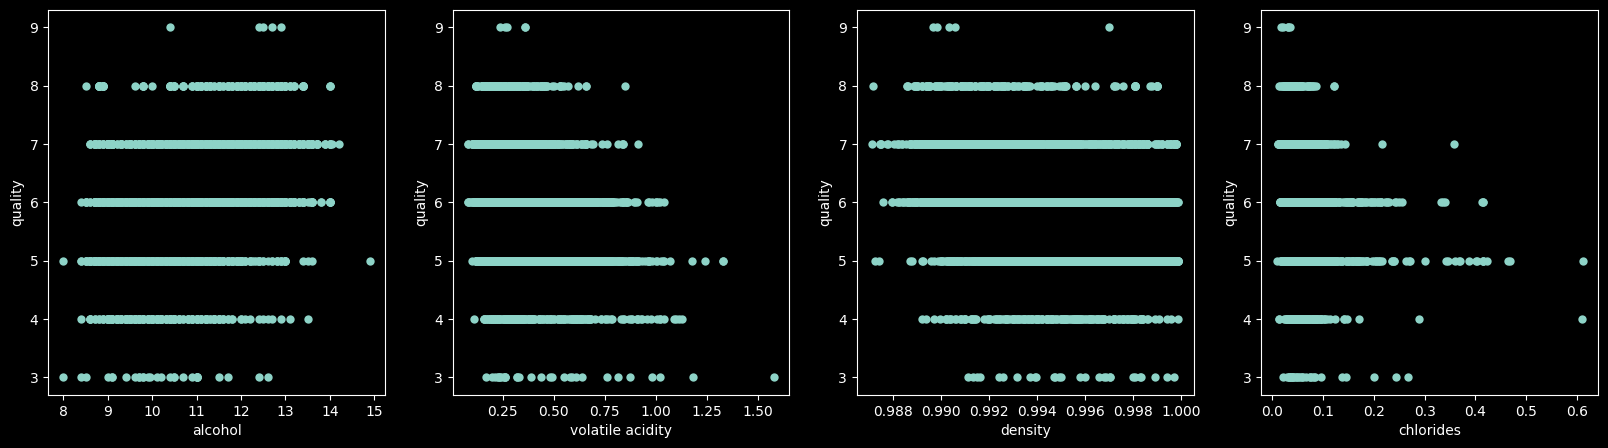

In [8]:
# + alcohol
# - volatile acidity
# - density
# - chlorides

fig, axes = plt.subplots(1, 4)
sns.scatterplot(x=df['alcohol'], y=df['quality'], linewidth=0, ax=axes[0]);
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[1]);
sns.scatterplot(x=df[df['density']<1]['density'], y=df[df['density']<1]['quality'], linewidth=0, ax=axes[2]);
sns.scatterplot(x=df['chlorides'], y=df['quality'], linewidth=0, ax=axes[3]);
plt.gcf().set_size_inches(20, 5)

# ML : 베이스라인 모델 구현, LinearRegression Model

In [9]:
# baseline 모델
# - 모든 독립 변수를 그대로 사용해 학습
# - r² = 27~30% → 품질 등급을 예측하기에는 모델 설명력 부족
# - 예측 결과를 반올림하여 정수 등급과 비교했을 때도 성능이 다소 낮음

# 종속변수 y : quality
from sklearn.model_selection import train_test_split
from sklearn import metrics

# train, test split
X=df.drop(['quality', 'target'], axis=1)
Y=df['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

# 학습
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# 예측
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


In [20]:
y_pred_test

array([6.18537176, 6.02182548, 6.2508491 , ..., 5.74068917, 5.90432759,
       5.62851368])

In [10]:
## mae score : 예측 오차가 적은 편
## r2 score(모델의 설명력) : 약 27~30% 사이로, 모델의 성능이 낮은 편에 속하는 것으로 판단

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)

r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')

mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)
print('')

# 검증 데이터 예측 결과값을 int로 수정 후 mae, r2 값은 오히려 저하되는 양상을 보임
pred_test = np.round(y_pred_test, 0).astype(int)

mae_test = mean_absolute_error(y_test, pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test,np.round(y_pred_test, 0))
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5700624829823149
r2_score(r2):  0.29987541828803677

mae_test(mae):  0.5639225414939322
r2_score(r2):  0.27009020069078404

mae_test(mae):  0.5148717948717949
r2_score(r2):  0.15096869440351546


In [11]:
# 실제 값과 예측 값에 대해 표현(정수값으로 변환)

df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(round(df_result['Predicted Values'],0))}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,8,7.00,1.00
1,5,5.00,0.00
2,7,6.00,1.00
3,6,6.00,0.00
4,6,5.00,1.00


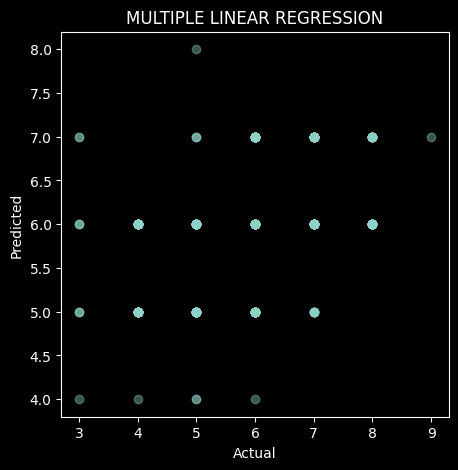

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test, df_result['Predicted Values'], alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.gcf().set_size_inches(5, 5)
plt.show()

# ML : 다중공선성 제거 후 해석력 개선, LinearRegression Model

In [13]:
# 다중공선성(Multicollinearity) 문제 해결을 통해 모델의 해석력과 일반화 성능 개선을 목표
# 공정 변수 간 상관관계 분석 및 해석을 중심으로 합니다

# 단순 예측이 아닌, 공정 변수 간 중복성(다중공선성)을 제거함으로써
# 회귀 모델의 해석 가능성과 안정성을 높이고자 한 실험이며
# 이는 품질에 영향을 주는 핵심 feature를 선별하고, 해당 변수의 실제 공정 관리에 적용 가능성을 탐색하는 데 목적이 있습니다.

# feature 별 상관계수
# 회귀계수 기반 와인 품질에 큰 영향을 미치는 feature는
# - : density, volatile acidity
# + : sulphates
df_coef = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef

,col,coef
0,fixed acidity,0.08
1,volatile acidity,-1.38
2,citric acid,-0.15
3,residual sugar,0.05
4,chlorides,-0.06
5,free sulfur dioxide,0.01
6,total sulfur dioxide,-0.00
7,density,-61.46
8,pH,0.46
9,sulphates,0.81


In [14]:
# 다중공선성 보이는 feature 파악
# density, residual sugar
# total sulfur dioxide, free sulfur dioxide
# density, alcohol

df_corr = df.corr()
df_corr = df_corr[(abs(df_corr) > 0.5)]
df_corr


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.00,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.00,0.72,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.72,1.00,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.55,NaN,NaN,NaN,1.00,NaN,NaN,-0.69,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN


In [15]:
# 다중공선성을 보이는 feature 제거 후 모델 구현
## mae score : 다중공선성 보이는 feature 제거 전 대비 예측 오차가 소폭 증가
## r2 score(모델의 설명력) : 새로운 데이터에서는 약 20% 설명력을 가는 것으로 나타났습니다.

from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'alcohol'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# 학습
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# 예측
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)

# 평가
mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)

print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

# int 로 변경 후 mae, r2_score 재확인
# 검증 데이터 예측 결과값을 int로 수정 후 mae, r2 값은 저하되는 양상을 보임
print('')
pred_test = np.round(y_pred_test, 0).astype(int)

mae_test = mean_absolute_error(y_test, pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test,np.round(y_pred_test, 0))
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.6121871035253349
r2_score(r2):  0.17454543049902005

mae_test(mae):  0.6303651329472835
r2_score(r2):  0.17348906467786518

mae_test(mae):  0.5994871794871794
r2_score(r2):  0.03143564356435624


In [16]:
#
df_coef_2 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_2


,col,coef
0,fixed acidity,0.09
1,volatile acidity,-1.08
2,citric acid,0.14
3,chlorides,-2.87
4,free sulfur dioxide,0.00
5,density,-89.06
6,pH,0.53
7,sulphates,0.91


In [17]:
# 다중공선성 제거 전/후 feature 비교
# 등급과 음의 상관성을 보이는 주요 feature 'density' 파악
pd.merge(df_coef, df_coef_2, left_on = 'col', right_on = 'col', how = 'left').sort_values(by = 'coef_y', ascending = False).reset_index(drop=True)

,col,coef_x,coef_y
0,sulphates,0.81,0.91
1,pH,0.46,0.53
2,citric acid,-0.15,0.14
3,fixed acidity,0.08,0.09
4,free sulfur dioxide,0.01,0.00
5,volatile acidity,-1.38,-1.08
6,chlorides,-0.06,-2.87
7,density,-61.46,-89.06
8,residual sugar,0.05,NaN
9,total sulfur dioxide,-0.00,NaN


# 주요 해석
1. density의 영향력 강화
density의 회귀계수가 -61.46 → -87.72로 더 커짐 (절대값 기준)

이는 공선성 변수들이 제거된 후 density의 고유 영향이 더 정확히 드러났음을 의미

→ density는 와인 품질과 매우 강한 음의 상관성을 가지며, 핵심적인 품질 결정 요인임

2. chlorides의 영향력 변화
chlorides 계수가 -0.06 → -2.46로 크게 증가

공선성 제거 후 chlorides의 품질 저하 영향이 더 명확히 드러남

3. 양의 영향력 변수 강화: sulphates
sulphates는 0.81 → 0.92로 증가

좋은 품질에 기여하는 양의 변수로서 더 뚜렷한 기여

4. 제거된 변수들: alcohol, residual sugar, etc.
alcohol, residual sugar 등은 공선성으로 인해 제거

이들 변수는 공선성이 있었기에 다른 변수와 영향력을 중복해 갖고 있었던 것으로 해석

# 요약
- 다중공선성 제거의 효과는 density, chlorides, sulphates 등 핵심 feature의 영향력을 더 뚜렷하게 밝혀주는 것에 있음
- density는 특히 품질 등급과 매우 강한 음의 상관관계를 가지므로, 공정 제어의 핵심 인자로 고려할 수 있음
- 분석 목적이 해석 가능성과 주요 인자 도출이라면, 이런 feature 비교는 매우 의미 있는 인사이트를 제공함

# ML : 이진분류 방식 접근

In [18]:
df_sc = df.copy()